In [1]:
#%pip install -r requirements.txt

In [2]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

Does this linear system have any solutions?

x1 - 2x2 + x3 = 0

2x2 - 8x3 = 8
     
5x1 - 5x3 = 10

Matrix a:

[1, -2, 3

0, 2, -8

5, 0, -5]


Matrix b, or the resultant vector:

[0

8

10]

Below we solve for x in ax = b (this is should remind us of y = mx + b). Which vector can we multiply a by to get b? Another question being asked and answered here: Is there a solution to the linear system shown in matrix form in matrix a? Or in other words, does there exist a vector, x, containing values for x1, x2, and x3 which can satisfy this system of linear equations?

In [3]:
# declare matrix
a = np.array([[1, -2, 1], [0, 2, -8], [5, 0, -5]])
# declare resultant vector
b = np.array([[0], [8], [10]])

In [4]:
a

array([[ 1, -2,  1],
       [ 0,  2, -8],
       [ 5,  0, -5]])

In [5]:
b

array([[ 0],
       [ 8],
       [10]])

In [6]:
linalg.solve(a, b)

array([[ 1.],
       [ 0.],
       [-1.]])

In [7]:
basis = np.array([[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]])
basis

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [8]:
first_transform = np.array([[0, 1, 2],
                            [3, 4, 5],
                            [6, 7, 8]])
first_transform

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [9]:
second_transform = np.array([[0, -2, 2],
                            [5, 1, 5],
                            [1, 4, -1]])
second_transform

array([[ 0, -2,  2],
       [ 5,  1,  5],
       [ 1,  4, -1]])

In [10]:
final_vector = np.matmul(second_transform, first_transform, basis)
final_vector

array([[ 6,  6,  6],
       [33, 44, 55],
       [ 6, 10, 14]])

# Elementary Row Operations
1. Replacement: Replace one row by the sum of itself and a multiple of another row.
2. Interchange: Interchange two rows.
3. Scaling: Multiply all entries in a row by a nonzero constant.

In [11]:
# Example 2: Is there a solution to the following linear system represented by this matrix? If so, is the solution set unique?
ex2_matrix = np.array([[1, -2, 1],
                 [0, 2, -8],
                 [5, 0, -5]])
ex2_soution_vector = np.array([[0], 
                               [8], 
                               [10]])

augmented_matrix = np.concatenate((ex2_matrix, ex2_soution_vector), axis = 1)
augmented_matrix

array([[ 1, -2,  1,  0],
       [ 0,  2, -8,  8],
       [ 5,  0, -5, 10]])

In [12]:
# Step 1: row2 = row2 * 1/2
augmented_matrix[1] = augmented_matrix[1] * 0.5
augmented_matrix

array([[ 1, -2,  1,  0],
       [ 0,  1, -4,  4],
       [ 5,  0, -5, 10]])

In [13]:
# Step 2: row3 = row1 * 5 - row3
augmented_matrix[2] = augmented_matrix[0] * 5 - augmented_matrix[2]
augmented_matrix

array([[  1,  -2,   1,   0],
       [  0,   1,  -4,   4],
       [  0, -10,  10, -10]])

In [14]:
# Step 3: row3 = row2 * 10 + row3
augmented_matrix[2] = augmented_matrix[1] * 10 + augmented_matrix[2]
augmented_matrix

array([[  1,  -2,   1,   0],
       [  0,   1,  -4,   4],
       [  0,   0, -30,  30]])

In [15]:
# Step 4: row3 = row3 / -30
augmented_matrix[2] = augmented_matrix[2] / -30
augmented_matrix

#x3 = -1

array([[ 1, -2,  1,  0],
       [ 0,  1, -4,  4],
       [ 0,  0,  1, -1]])

In [16]:
#x1 = 1
#x2 = 0
#x3 = -1
# Yes, the linear system has a unique solution: [1, 0, -1]

# Check
linalg.solve(ex2_matrix, ex2_soution_vector)

array([[ 1.],
       [ 0.],
       [-1.]])

In [17]:
# Example 3: Is there a solution to the following linear system represented by this matrix? If so, is the solution set unique?
ex3_matrix = np.array([[0, 1, -4],
                 [2, -3, 2],
                 [4, -8, 12]])
ex3_soution_vector = np.array([[8], 
                               [1], 
                               [1]])

augmented_matrix = np.concatenate((ex2_matrix, ex2_soution_vector), axis = 1)
augmented_matrix

array([[ 1, -2,  1,  0],
       [ 0,  2, -8,  8],
       [ 5,  0, -5, 10]])

In [18]:
try:
    print(linalg.solve(ex3_matrix, ex3_soution_vector))
except:
    print('The matrix has no solutions.')

The matrix has no solutions.


In [19]:
augmented_matrix = np.array([
    [2, 4, -4],
    [5, 7, 11],
]
)
augmented_matrix[:,-2:]

array([[ 4, -4],
       [ 7, 11]])

In [20]:
# Determine if the augmented matrix is consistent
augmented_matrix = np.array([
    [1, -3, 4, -4],
    [3, -7, 7, -8],
    [-4, 6, -1, 7]
]
)

try:
    print(linalg.solve(augmented_matrix[:,:-1], augmented_matrix[:,[-1]]))
except:
    print('The linear system has no solutions.')

The linear system has no solutions.


In [21]:
# 1.1 Question 17
# Determine if the augmented matrix is consistent
augmented_matrix = np.array([
    [1, -4, 1],
    [2, -1, -3],
    [-1, -3, 4]
]
)

try:
    print(linalg.solve(augmented_matrix[:,:-1], augmented_matrix[:,[-1]]))
except:
    print('The linear system has no solutions.')

The linear system has no solutions.


In [22]:
linalg.solve(augmented_matrix[:,:-1], augmented_matrix[:,[-1]])
# I have now learned that np.linalg.solve() and linalg.solve() can only take square input matrices for A (Ax=b)

ValueError: Input a needs to be a square matrix.

In [33]:
# np.linalg.lstsq() is recommended for non-square input matrices. The first element in the output is the vector x in Ax=b that we're looking for
vector_x = np.linalg.lstsq(a = augmented_matrix[:,:-1], b = augmented_matrix[:,[-1]], rcond = None)[0]
vector_x

array([[-1.85714286],
       [-0.71428571]])

Text(0.5, 0.5, '[[-1.85714286]\n [-0.71428571]]')

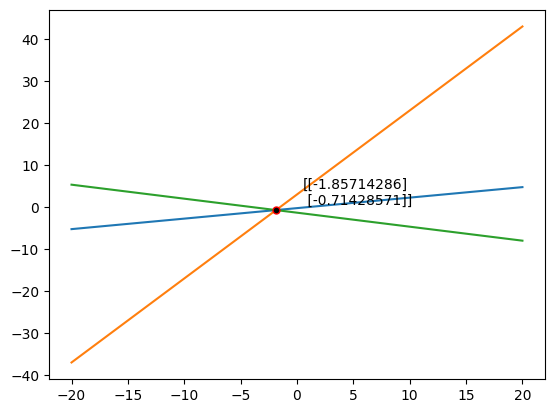

In [57]:
# Visualize question 17
x = np.array(range(-20, 21))
y1 = [(x - 1) / 4 for x in x]
y2 = [(2 * x) + 3 for x in x]
y3 = [(-4 - x) / 3 for x in x]

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(vector_x[0], vector_x[1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="black")
plt.annotate(str(vector_x), (vector_x[0], vector_x[1]), xytext=(0.5, 0.5))

In [91]:
augmented_matrix = np.array([
    [1, -4, 7, 1],
    [0, 3, -5, 2],
    [-2, 5, -9, 3]
]
)

In [92]:
np.linalg.lstsq(augmented_matrix[:,:-1], augmented_matrix[:,[-1]], rcond = None)

(array([[-0.17619048],
        [ 0.04761905],
        [-0.13809524]]),
 array([], dtype=float64),
 2,
 array([1.44566660e+01, 1.00240102e+00, 3.96487145e-16]))

In [ ]:
# %pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
